# 
<u><h1>Task-04</h1><hr></u>
<h3>Problem statement -</h3>
<p>Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.</p>
<h3>Dataset used - </h3><p>Twitter sentiment analysis</p>
<h3>Source of the dataset -</h3>
<p>Kaggle</p>
<h3>Description -</h3>
<p>The dataset used is from Twitter and focuses on sentiment analysis. It includes tweet IDs, topics, sentiments (positive, negative, or neutral), and tweet contents. This dataset enables analysis of sentiment trends, public opinions, and common words associated with different sentiment categories.</p>
<h3>Aim -</h3>
<p>The aim is to analyze and visualize sentiment patterns in Twitter and to understand public opinions and attitudes towards a particular topic or brand.</p>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data_path = r"C:\Users\Hp\Downloads\twitter_training.csv"
df = pd.read_csv(data_path, header=None)

df.columns = ['ID', 'Topic', 'Sentiment', 'Content']

In [42]:
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [43]:
print(df.describe())

                 ID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [45]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['Content'], inplace=True)

In [46]:
# Ensuring 'Content' is treated as string and handle non-string values
df['Content'] = df['Content'].astype(str)

# Displaying the data after cleaning
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 71656 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71656 non-null  int64 
 1   Topic      71656 non-null  object
 2   Sentiment  71656 non-null  object
 3   Content    71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB
None
     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [47]:
# Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()

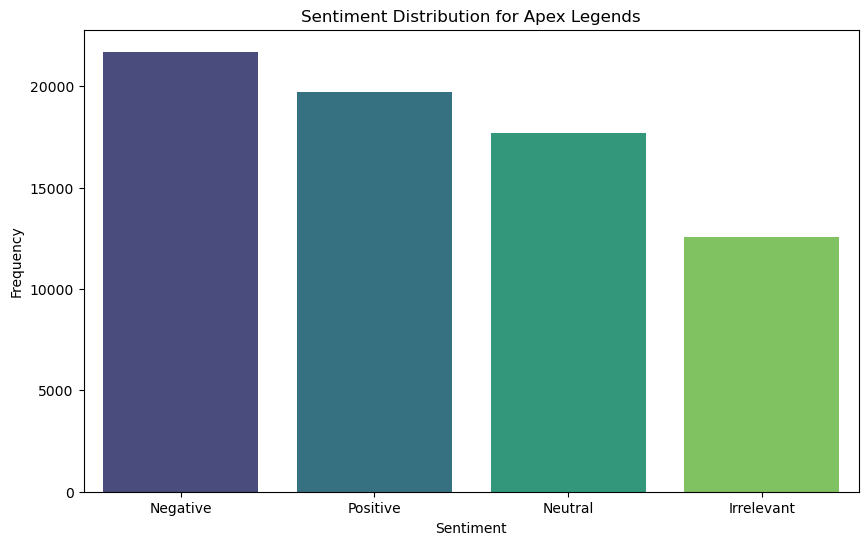

In [48]:
# Plotting the Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution for Apex Legends')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

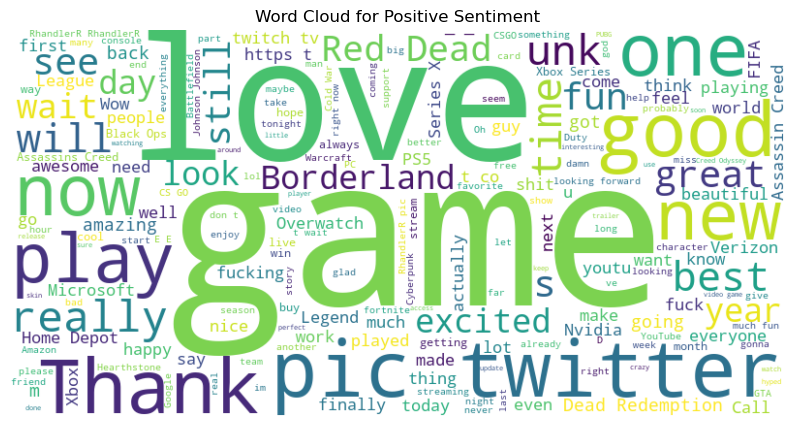

In [49]:
# Word Cloud for Positive Sentiment
positive_content = " ".join(df[df['Sentiment'] == 'Positive']['Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_content)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

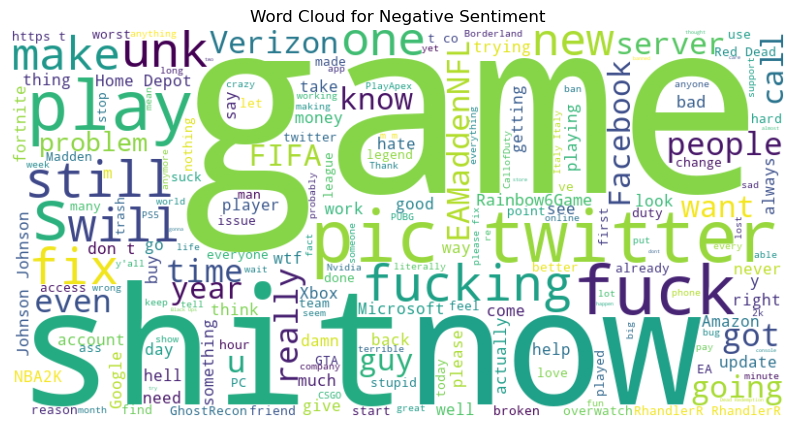

In [50]:
# Word Cloud for Negative Sentiment
negative_content = " ".join(df[df['Sentiment'] == 'Negative']['Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_content)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()

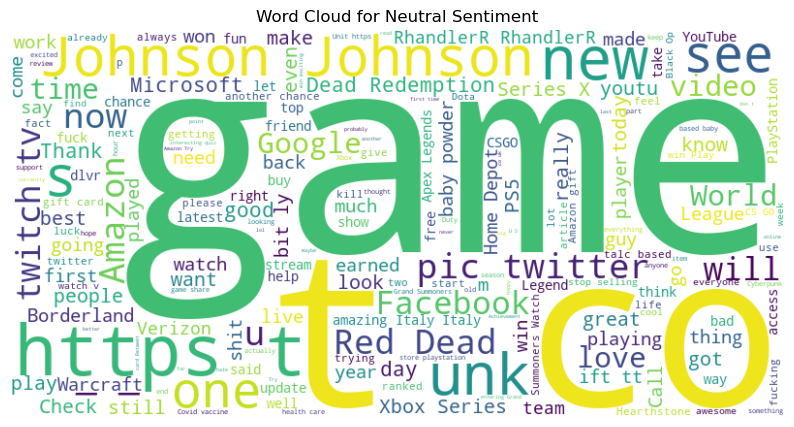

In [51]:
# Word Cloud for Neutral Sentiment
neutral_content = " ".join(df[df['Sentiment'] == 'Neutral']['Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_content)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

In [52]:
# Top words by sentiment
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_top_words(sentiment):
    content = df[df['Sentiment'] == sentiment]['Content']
    words = " ".join(content).split()
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(10)

positive_words = get_top_words('Positive')
negative_words = get_top_words('Negative')
neutral_words = get_top_words('Neutral')

print("Top Words in Positive Sentiment:", positive_words)
print("Top Words in Negative Sentiment:", negative_words)
print("Top Words in Neutral Sentiment:", neutral_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Words in Positive Sentiment: [('game', 1689), ('love', 1588), ('good', 1324), ('like', 1244), ('really', 1235), ('new', 1149), ('best', 1017), ('play', 912), ('one', 906), ('great', 891)]
Top Words in Negative Sentiment: [('game', 2937), ('get', 1632), ('like', 1524), ('fix', 1264), ('shit', 1156), ('fuck', 1086), ('play', 1082), ('fucking', 1061), ('still', 1028), ('please', 993)]
Top Words in Neutral Sentiment: [('johnson', 1663), ('game', 947), ('get', 862), ('amazon', 862), ('like', 843), ('new', 818), ('one', 768), ('play', 695), ('google', 656), ('facebook', 652)]


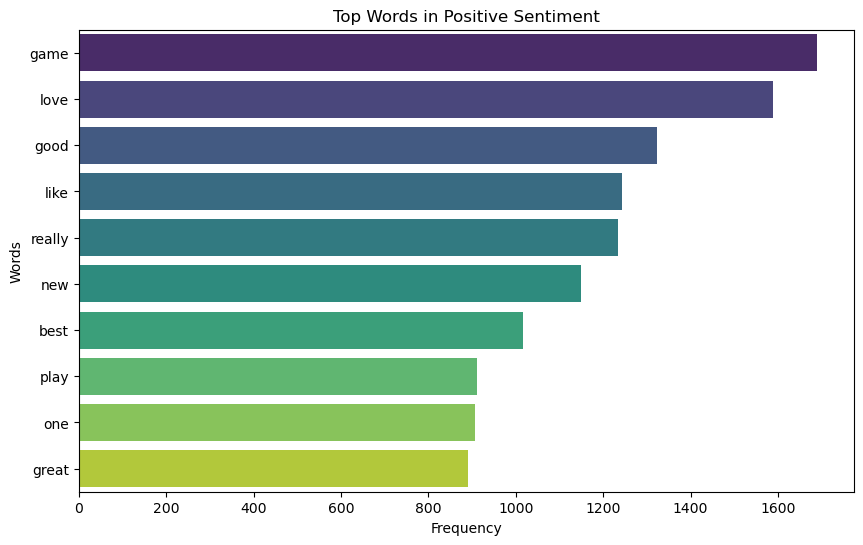

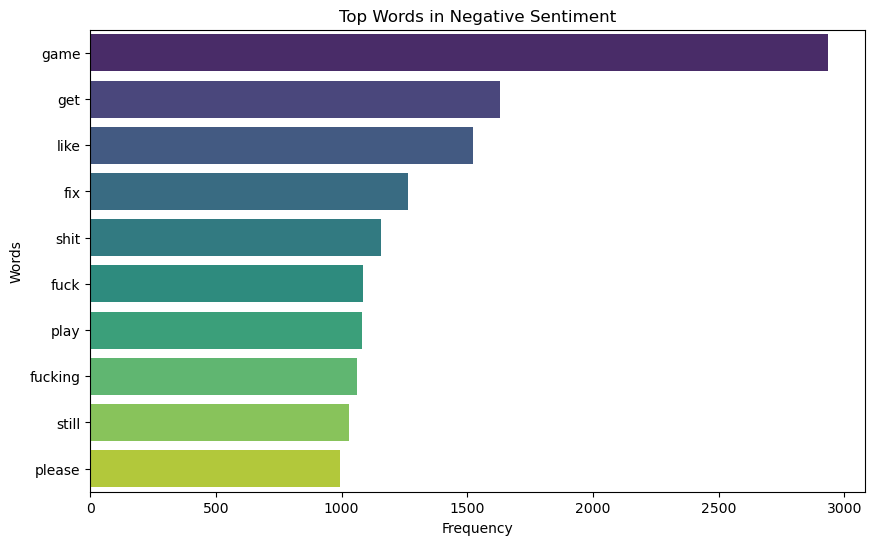

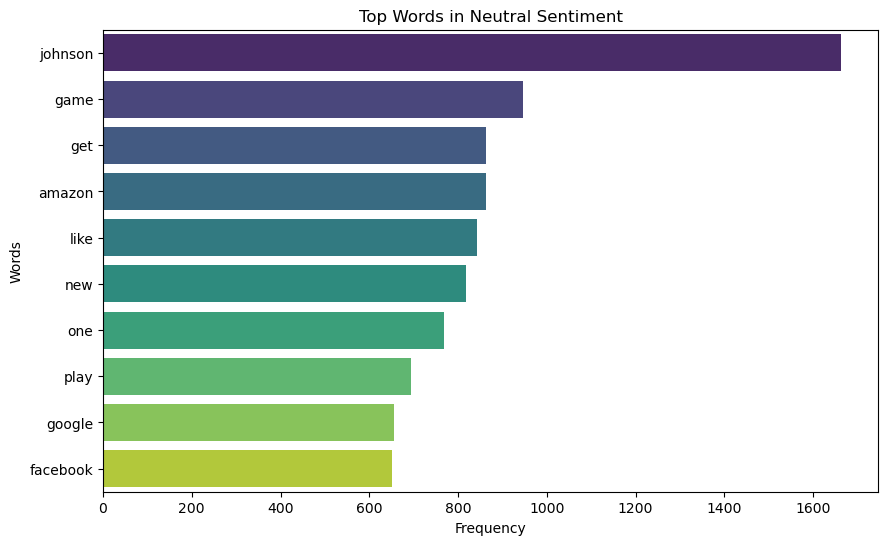

In [53]:
# Plotting top words by sentiment
def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_words(positive_words, 'Top Words in Positive Sentiment')
plot_top_words(negative_words, 'Top Words in Negative Sentiment')
plot_top_words(neutral_words, 'Top Words in Neutral Sentiment')

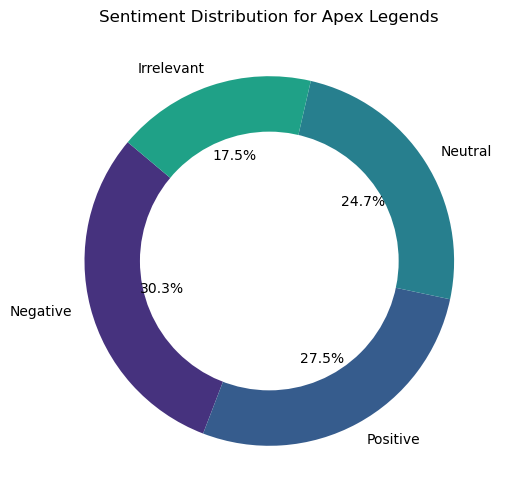

In [54]:
# Doughnut Chart Sentiment Distribution
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Distribution for Apex Legends')
plt.show()

# <h3>Inference</h3>
<p>We have conducted sentiment analysis on Twitter data regarding Apex Legends, focusing on understanding public opinion and attitudes towards the game. Through data cleaning, sentiment distribution visualization, word cloud generation, and analysis of top words by sentiment, the script uncovers valuable insights. The sentiment distribution shows positive, negative, and neutral sentiments, indicating a diverse range of opinions. Word clouds offer a visual representation of frequently occurring words, highlighting key themes within each sentiment category. Furthermore, the analysis of top words provides deeper context, showing prominent terms associated with different sentiments.</p>